# SALES PREDICTION USING PYTHON

## Importing Libraries

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [3]:
with open('car_purchasing.csv', 'rb') as file:
    result = chardet.detect(file.read())

detected_encoding = result['encoding']
confidence = result['confidence']

print(f"Detected encoding: {detected_encoding} (confidence: {confidence})")


Detected encoding: ISO-8859-1 (confidence: 0.73)


In [4]:
df = pd.read_csv("car_purchasing.csv", encoding = 'ISO-8859-1')

In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Preprocessing

In [6]:
df.drop(['customer name', 'customer e-mail', 'country', 'gender'], axis = 1, inplace = True)

In [7]:
df.isnull().sum()

age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Data Visualization

### Scatterplot between annual salary and car purchase amount

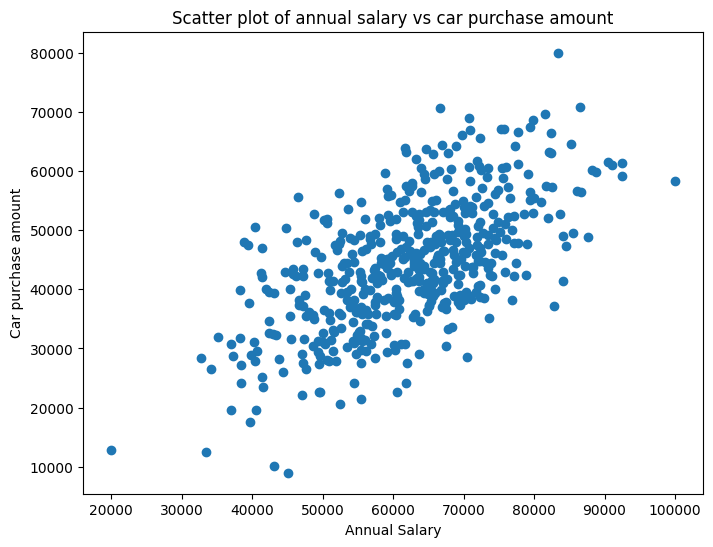

In [9]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['annual Salary'], df['car purchase amount'])
plt.xlabel('Annual Salary')
plt.ylabel('Car purchase amount')
plt.title('Scatter plot of annual salary vs car purchase amount')
plt.show()

### Scatterplot between credit card debit and car purchase amount

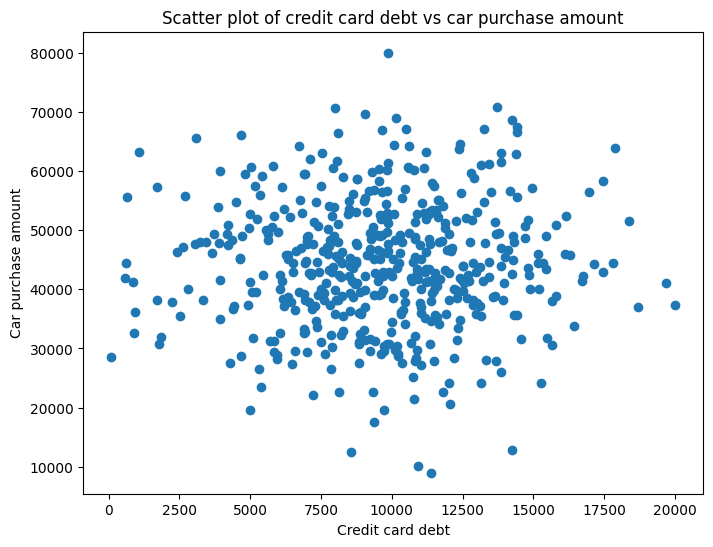

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(df['credit card debt'], df['car purchase amount'])
plt.xlabel('Credit card debt')
plt.ylabel('Car purchase amount')
plt.title('Scatter plot of credit card debt vs car purchase amount')
plt.show()

### Scatterplot between net worth and car purchase amount

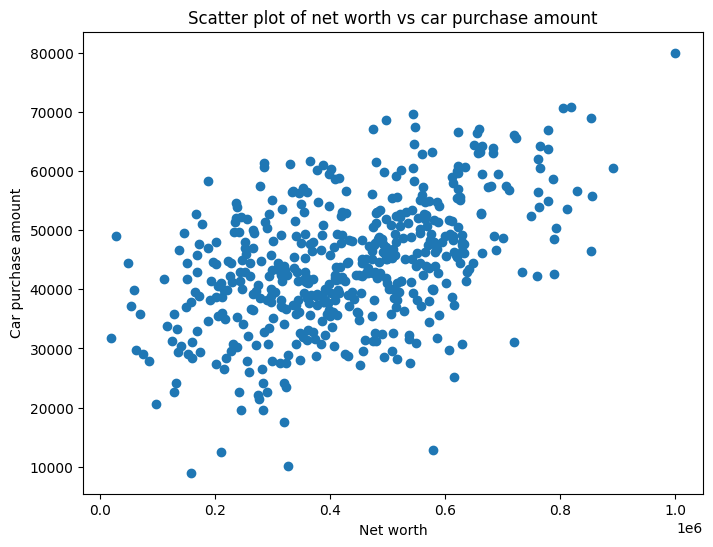

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(df['net worth'], df['car purchase amount'])
plt.xlabel('Net worth')
plt.ylabel('Car purchase amount')
plt.title('Scatter plot of net worth vs car purchase amount')
plt.show()

## Train Test Split

In [12]:
x_data = df.drop(['car purchase amount'], axis = 1)

In [13]:
y_data = df['car purchase amount']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

## Model Building

In [15]:
lr = LinearRegression()

In [16]:
lr = lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

## Evaluation Metrics

In [17]:
print("Mean square error of LinearRegression is {}".format(mean_squared_error(y_test, y_predict)))
print("Root mean squared error of LinearRegression is {}".format(np.sqrt(mean_squared_error(y_test,y_predict))))
print("Mean absolute error is {}".format(mean_absolute_error(y_test,y_predict)))
print('R2 score: {}'. format (r2_score(y_test , y_predict )))

Mean square error of LinearRegression is 2.004554413769234
Root mean squared error of LinearRegression is 1.415822875139837
Mean absolute error is 1.1064145946149802
R2 score: 0.9999999801556931


## Prediction on Unseen Data

In [18]:
lr.predict([[38.237843, 75392.099312, 9999.957136, 638467.1773]])

c:\Users\sahuk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50932.67239959])